In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import yfinance as yf
from scipy.signal import argrelextrema
# from collections import deque
# from matplotlib.lines import Line2D
import pandas_ta as ta
import ccxt
from datetime import datetime
import plotly.graph_objects as go
import inspect 


pd.set_option('display.max_rows', None)


In [2]:
exchange = ccxt.kucoin()
exchange.load_markets()

symbols = exchange.symbols

In [15]:
# ticker = 'BTC-USDT'
# timeframe ='4h'
def ccxt_data(ticker='BTC-USDT', timeframe ='4h', limit=600):
    bars = exchange.fetch_ohlcv(ticker, timeframe, limit)
    data = pd.DataFrame(bars[:], columns=['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
    data['Time'] = pd.to_datetime(data['Time'], unit='ms')
    data.set_index('Time', inplace=True)
    return data

In [4]:
# plt.figure(figsize=(15, 8))
# plt.plot(data['Close'])
# plt.title(f'Price Chart for {ticker}')
# plt.xlabel('Date')
# plt.ylabel('Price ($)')
# plt.show()


In [5]:

'''# data['Close'][True] --> return the close value of that row
# data['Close'][False] --> return NAN


data['local_max'] = data['Close'][(data['Close'].shift(1) < data['Close']) & (data['Close'].shift(-1) < data['Close'])]
data['local_min'] = data['Close'][(data['Close'].shift(1) > data['Close']) & (data['Close'].shift(-1) > data['Close'])]


data['rsi_max'] = data['ta_rsi'][(data['ta_rsi'].shift(1) < data['ta_rsi']) & (data['ta_rsi'].shift(-1) < data['ta_rsi'])]
data['rsi_min'] = data['ta_rsi'][(data['ta_rsi'].shift(1) > data['ta_rsi']) & (data['ta_rsi'].shift(-1) > data['ta_rsi'])]

# data['rsi_min'].dropna()

df_min = data[['rsi_min', 'local_min']]
df_min = df_min[(df_min.rsi_min.notna()) & (df_min.local_min.notna())]


df_max = data[['rsi_max', 'local_max']]
df_max = df_max[(df_max.rsi_max.notna()) & (df_max.local_max.notna())]

# for i in range(len(df_max) - 1):
#     if (df_max.iloc[i]['rsi_max'] > df_max.iloc[i+1]['rsi_max']) & (df_max.iloc[i]['local_max'] < df_max.iloc[i+1]['local_max']):
#         print(df_max.index[i], 'and ', df_max.index[i+1])

diff1 = df_max.diff()
diff2 = df_max.diff(2)
diff3 = df_max.diff(3)
# print(diff1)

# print(diff1[~((diff1 > 0).all(1)) & ~((diff1 < 0).all(1))])
print(diff2[~((diff2 > 0).all(1)) & ~((diff2 < 0).all(1))])


# plt.plot(ta_rsi)



# max_lst = data['local_max'].tolist()
# min_lst = data['local_min'].tolist()

# colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# plt.figure(figsize=(15, 8))
# plt.plot(data['Close'], zorder=0)

# scatter is the function responsible of drawing dots and shapes on the chart
# plt.scatter(data.index, data['local_max'], s=100,label='Maxima', marker='^', c=colors[1])
# plt.scatter(data.index, data['local_min'], s=100, label='Minima', marker='v', c=colors[2])

# plt.xlabel('Date')
# plt.ylabel('Price ($)')
# plt.title(f'Local Maxima and Minima for {ticker}')
# plt.legend()
# plt.show()

# print(df_max)'''


"# data['Close'][True] --> return the close value of that row\n# data['Close'][False] --> return NAN\n\n\ndata['local_max'] = data['Close'][(data['Close'].shift(1) < data['Close']) & (data['Close'].shift(-1) < data['Close'])]\ndata['local_min'] = data['Close'][(data['Close'].shift(1) > data['Close']) & (data['Close'].shift(-1) > data['Close'])]\n\n\ndata['rsi_max'] = data['ta_rsi'][(data['ta_rsi'].shift(1) < data['ta_rsi']) & (data['ta_rsi'].shift(-1) < data['ta_rsi'])]\ndata['rsi_min'] = data['ta_rsi'][(data['ta_rsi'].shift(1) > data['ta_rsi']) & (data['ta_rsi'].shift(-1) > data['ta_rsi'])]\n\n# data['rsi_min'].dropna()\n\ndf_min = data[['rsi_min', 'local_min']]\ndf_min = df_min[(df_min.rsi_min.notna()) & (df_min.local_min.notna())]\n\n\ndf_max = data[['rsi_max', 'local_max']]\ndf_max = df_max[(df_max.rsi_max.notna()) & (df_max.local_max.notna())]\n\n# for i in range(len(df_max) - 1):\n#     if (df_max.iloc[i]['rsi_max'] > df_max.iloc[i+1]['rsi_max']) & (df_max.iloc[i]['local_max'] < 

In [6]:
data=ccxt_data() 
# calc indicator
data['ta_rsi'] = ta.rsi(data['Close'], length = 14)

# calc peaks and troughs of close price and the indicator(s)
coin_peak = argrelextrema(data['Close'].values, np.greater, order=5)[0]
coin_peaks_df = data.iloc[coin_peak]['Close']

ta_peak = argrelextrema(data['ta_rsi'].values, np.greater, order=5)[0]
ta_peaks_df = data.iloc[ta_peak]['ta_rsi']

coin_trough = argrelextrema(data['Close'].values, np.less, order=5)[0]
coin_trough_df = data.iloc[coin_trough]['Close']

ta_trough = argrelextrema(data['ta_rsi'].values, np.less, order=5)[0]
ta_trough_df = data.iloc[ta_trough]['ta_rsi']

peaks = [coin_peaks_df, ta_peaks_df]
peaks_df = pd.concat(peaks, axis=1)
peaks_df = peaks_df[(peaks_df.Close.notna()) & (peaks_df.ta_rsi.notna())]

troughs = [coin_trough_df, ta_trough_df]
troughs_df = pd.concat(troughs, axis=1)
troughs_df = troughs_df[(troughs_df.Close.notna()) & (troughs_df.ta_rsi.notna())]

# def trough_diff(n=1):

#     diff = troughs_df.diff(n)
#     sig = diff[~((diff > 0).all(1)) & ~((diff < 0).all(1))]
#     return sig

# def peak_diff(n=1):

#     diff = peaks_df.diff(n)
#     sig = diff[~((diff > 0).all(1)) & ~((diff < 0).all(1))]
#     return sig


In [16]:
def signal_dates(n=9):

    dates_of_peaks = []
    for i in range(n):
        if i == 0:
            diff = peaks_df.diff(1)
            sig = diff[~((diff > 0).all(1)) & ~((diff < 0).all(1))]
            dates_of_peaks.append(sig.index.values)
            continue
        diff = peaks_df.diff(i)
        sig = diff[~((diff > 0).all(1)) & ~((diff < 0).all(1))]
        dates_of_peaks.append(sig.index.values)

    dates_of_troughs = []
    for i in range(n):
        if i == 0:
            diff = troughs_df.diff(1)
            sig = diff[~((diff > 0).all(1)) & ~((diff < 0).all(1))]
            dates_of_troughs.append(sig.index.values)
            continue
        diff = troughs_df.diff(i)
        sig = diff[~((diff > 0).all(1)) & ~((diff < 0).all(1))]
        dates_of_troughs.append(sig.index.values)


    sell = []
    for list in dates_of_peaks:
        for i in list:
            if i not in sell:
                sell.append(i)

    buy = []
    for list in dates_of_troughs:
        for i in list:
            if i not in buy:
                buy.append(i)

    sell.sort()
    buy.sort()

    return sell, buy



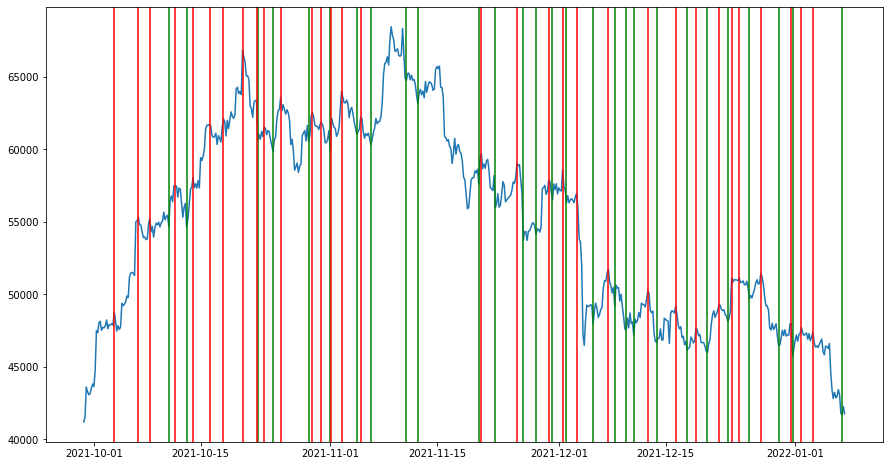

In [8]:
plt.figure(figsize=(15, 8))
plt.plot(data['Close'], zorder=0)

sell, buy = signal_dates()

for xc in buy:
    plt.axvline(x=xc,color='g')

for xc in sell:
    plt.axvline(x=xc,color='r')

plt.show()

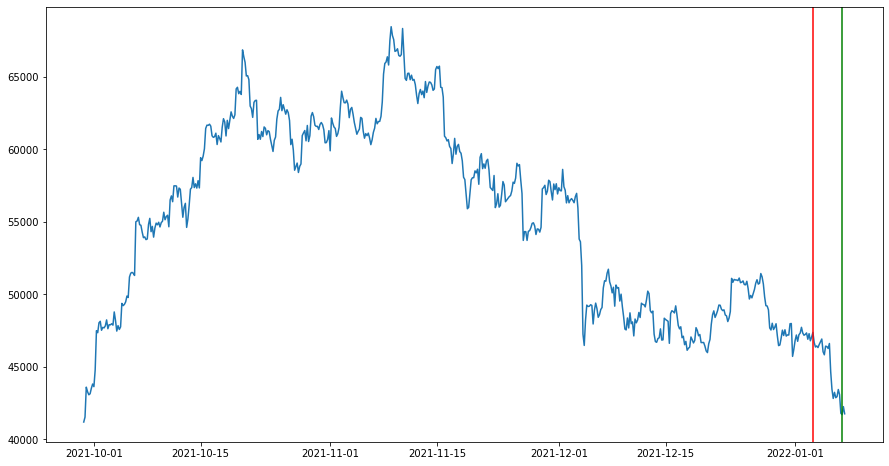

In [17]:
plt.figure(figsize=(15, 8))
plt.plot(data['Close'], zorder=0)

sell, buy = signal_dates()

b = buy[-1]
plt.axvline(x=b,color='g')

s = sell[-1]
plt.axvline(x=s,color='r')

plt.show()



In [20]:
ticker = str(inspect.signature(ccxt_data).parameters['ticker'])
timeframe = str(inspect.signature(ccxt_data).parameters['timeframe'])

print(f'last buy signal for {ticker} in {timeframe}  was {buy[-1]}')
print(f'last sell signal for {ticker} in {timeframe}  was {sell[-1]}')

last buy signal for ticker='BTC-USDT' in timeframe='4h'  was 2022-01-07T04:00:00.000000000
last sell signal for ticker='BTC-USDT' in timeframe='4h'  was 2022-01-03T08:00:00.000000000


In [19]:
# test strategy

# f = open('C:\\Users\\Grant\\virenv\\ttm\\txts\\usdt.txt', 'r')
# content = f.read()
import uuu
usdt_pairs = uuu.usdt_pairs


for symbol in usdt_pairs:
    try:
        ccxt_data(symbol)
    except:
        pass